<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/regression/mvrt_class_partA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/pharringtonp19/business-analytics.git

Cloning into 'business-analytics'...
remote: Enumerating objects: 1126, done.
remote: Counting objects: 100% (743/743), done.
remote: Compressing objects: 100% (296/296), done.
remote: Total 1126 (delta 523), reused 601 (delta 422), pack-reused 383 (from 1)
Receiving objects: 100% (1126/1126), 20.23 MiB | 22.04 MiB/s, done.
Resolving deltas: 100% (651/651), done.


### **Import Packages**

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import jax.numpy as jnp
import jax
import seaborn as sb
from functools import partial

### **Read In Data Set**

In [4]:
df = pd.read_csv('/content/business-analytics/datasets/CASchools.csv')
df['Students_per_Teacher'] = df['students'] / df['teachers']
df.head()

,Unnamed: 0,district,school,county,grades,students,teachers,calworks,lunch,computer,expenditure,income,english,read,math,Students_per_Teacher
0,1,75119,Sunol Glen Unified,Alameda,KK-08,195,10.900000,0.510200,2.040800,67,6384.911133,22.690001,0.000000,691.599976,690.000000,17.889909
1,2,61499,Manzanita Elementary,Butte,KK-08,240,11.150000,15.416700,47.916698,101,5099.380859,9.824000,4.583333,660.500000,661.900024,21.524664
2,3,61549,Thermalito Union Elementary,Butte,KK-08,1550,82.900002,55.032299,76.322601,169,5501.954590,8.978000,30.000002,636.299988,650.900024,18.697225
3,4,61457,Golden Feather Union Elementary,Butte,KK-08,243,14.000000,36.475399,77.049202,85,7101.831055,8.978000,0.000000,651.900024,643.500000,17.357143
4,5,61523,Palermo Union Elementary,Butte,KK-08,1335,71.500000,33.108601,78.427002,171,5235.987793,9.080333,13.857677,641.799988,639.900024,18.671329


### **Question #1**

In [5]:
linear_model = smf.ols('math ~ Students_per_Teacher', data=df)

### **Question #2**

In [7]:
results1 = linear_model.fit()

### **Question #3**

In [8]:
def model1(params, x):
  return params[0] + params[1]*x

### **Question #4**

In [9]:
xs = jnp.linspace(df['Students_per_Teacher'].min(), df['Students_per_Teacher'].max(), 1000)

### **Question #5**

In [11]:
f = partial(model1, results1.params.values)
ys = jax.vmap(f)(xs)

### **Question #6**

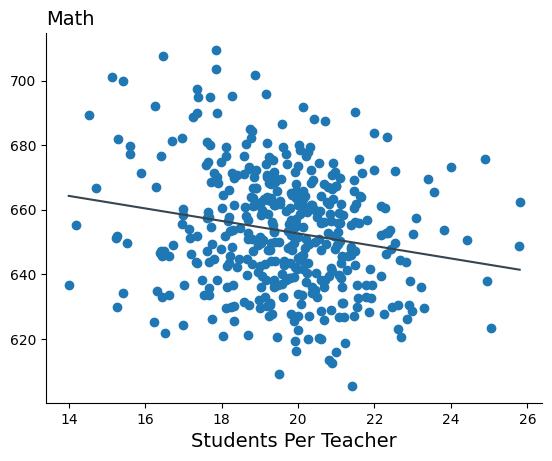

In [12]:
plt.plot(xs, ys, color="#36454F")
plt.scatter(df['Students_per_Teacher'], df['math'])
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('Students Per Teacher', size=14)
plt.title('Math', loc='left', size=14)
plt.show()